# créer des data frame et afficher les premières lignes

In [50]:
# créer des data frame
import pandas as pd
data = pd.read_csv("C:/Users/anass/Desktop/Super_Market_Analysis/SuperMarketAnalysis - Copie.csv")

df = pd.DataFrame(data)

# afficher les premières lignes
df.head()

,ID_Facture,Succursale,Ville,Type_Client,Genre,Categorie_Produit,Prix_Unitaire,Quantite,Taxe_5%,Total,Date,Heure,Methode_Paiement,CMV,Pourcentage_Marge_Brute,Revenu_Brut,Note_Satisfaction
0,750-67-8428,Alex,NaN,Member,Female,Health and beauty,74.69,NaN,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


# drop columns ('CMV', 'Pourcentage_Marge_Brute', 'Revenu_Brut')

In [51]:
df = df.drop(columns = ['CMV', 'Pourcentage_Marge_Brute', 'Revenu_Brut'])
df.head()

,ID_Facture,Succursale,Ville,Type_Client,Genre,Categorie_Produit,Prix_Unitaire,Quantite,Taxe_5%,Total,Date,Heure,Methode_Paiement,Note_Satisfaction
0,750-67-8428,Alex,NaN,Member,Female,Health and beauty,74.69,NaN,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,5.3


# remove duplicate values in data frame

In [52]:
df.shape

(1000, 14)

In [53]:
df = df.drop_duplicates()
df.shape

(1000, 14)

# fréquences de valeurs manquantes

In [54]:
freq = (df.isna().sum() / len(df)) * 100
freq

ID_Facture            0.0
Succursale            1.2
Ville                 1.3
Type_Client           0.0
Genre                 0.0
 Categorie_Produit    0.0
Prix_Unitaire         0.6
Quantite              0.7
Taxe_5%               0.5
Total                 0.7
Date                  0.0
Heure                 0.0
Methode_Paiement      0.0
Note_Satisfaction     0.0
dtype: float64

# afficher les valeurs null

<Axes: >

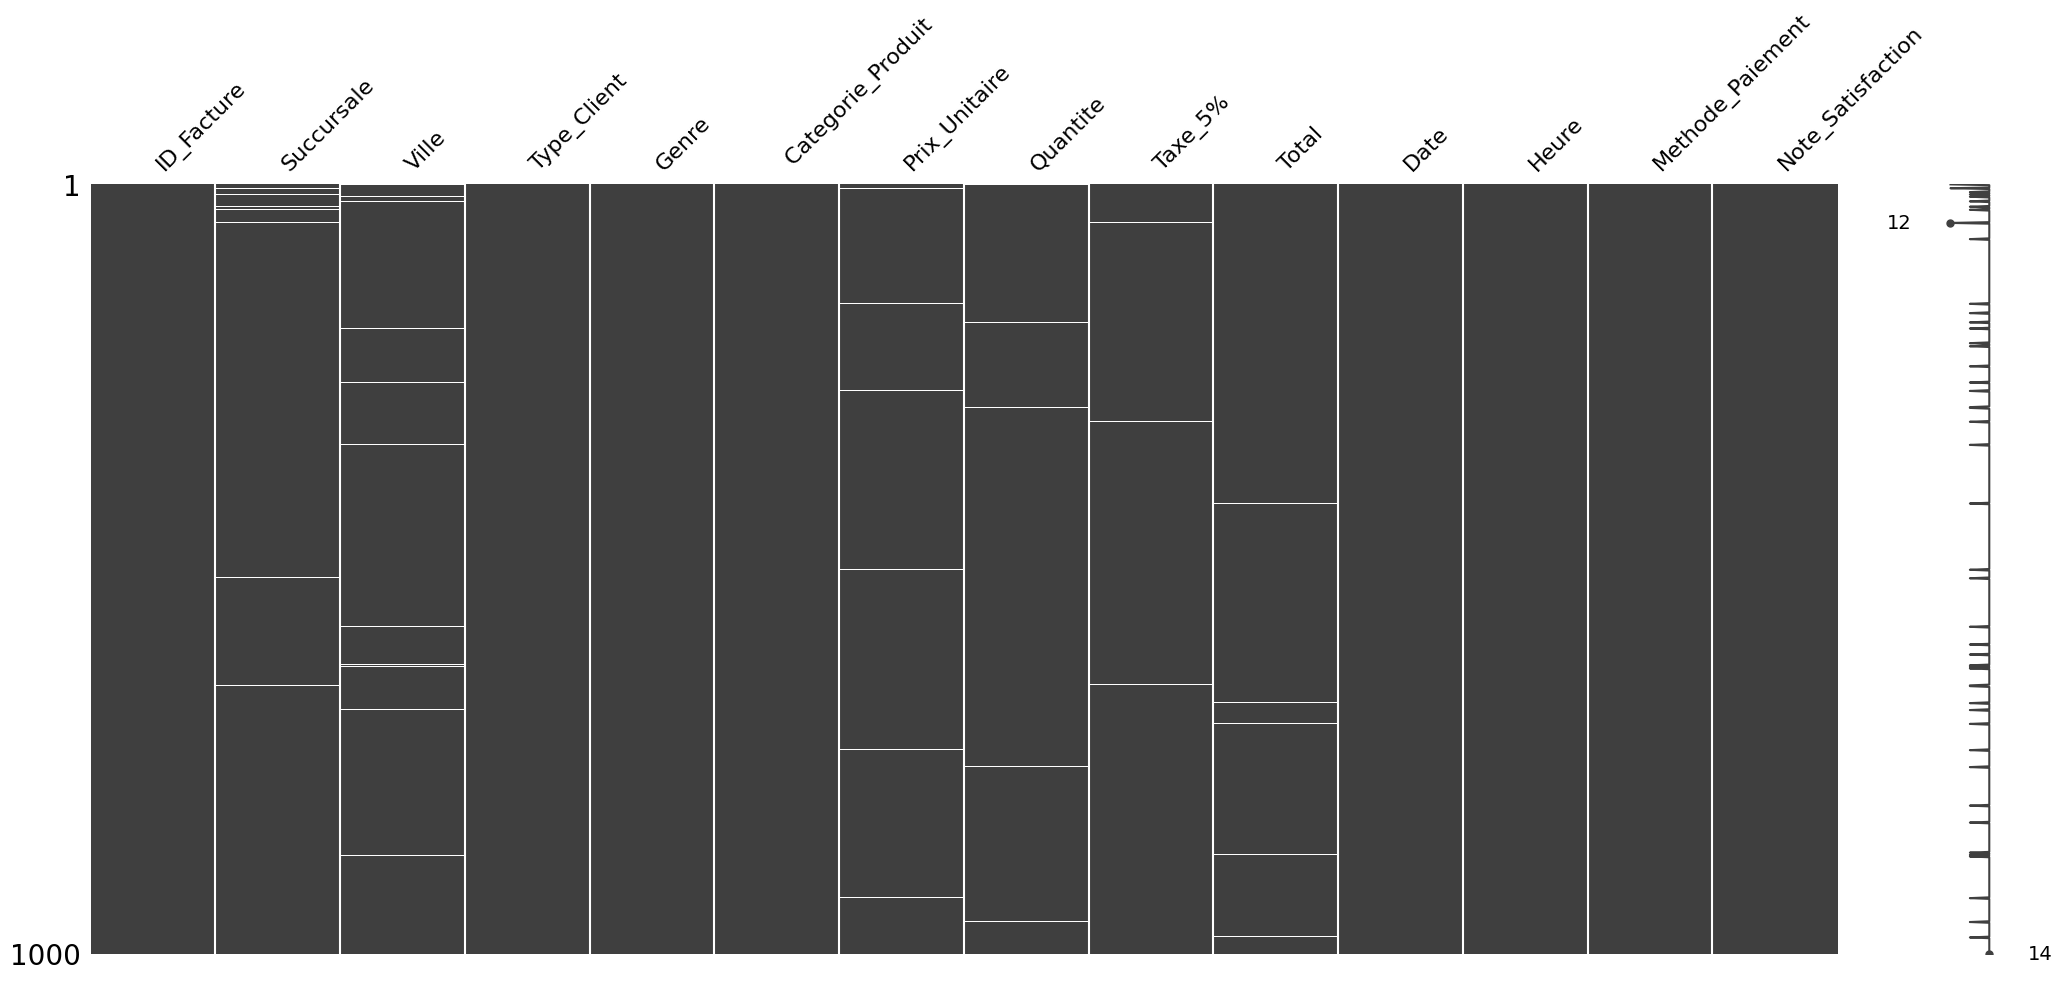

In [55]:
import missingno as msno
msno.matrix(df)

<Axes: >

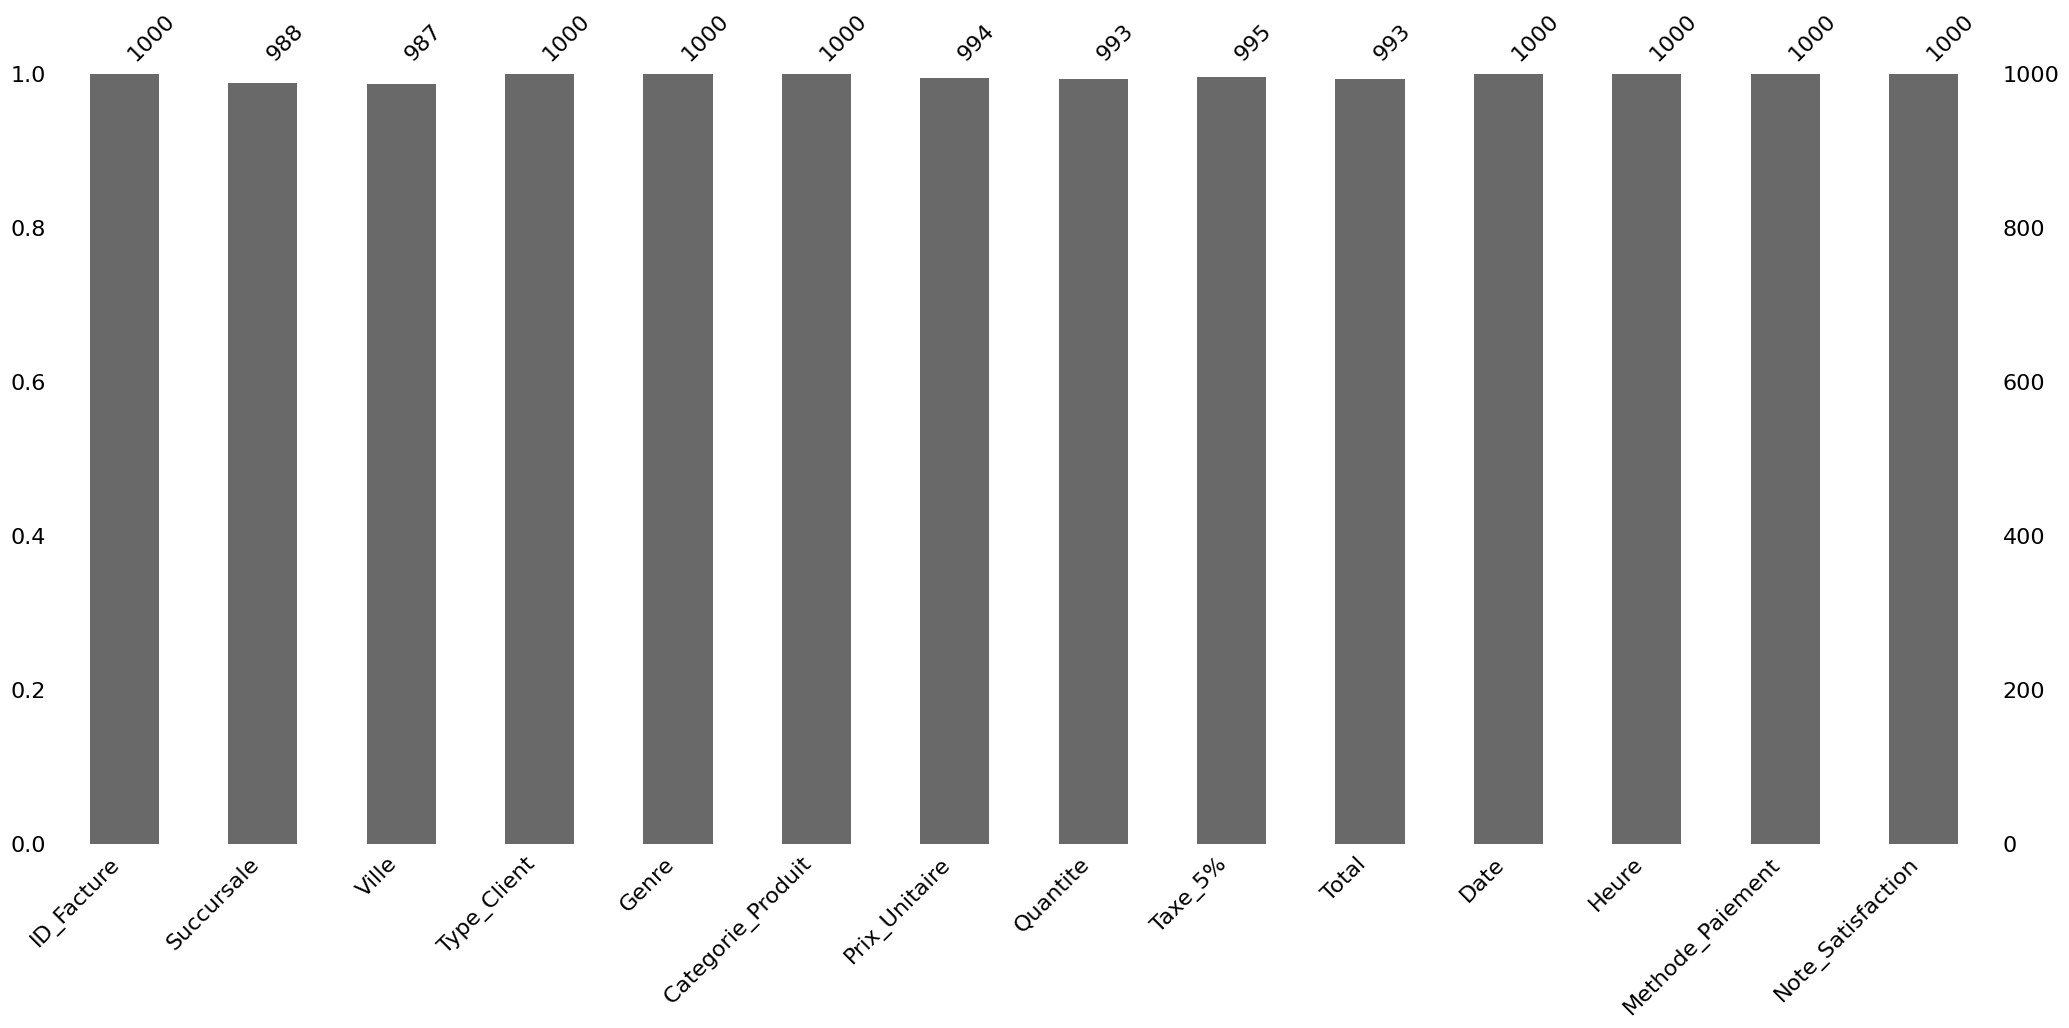

In [56]:

msno.bar(df)


# les types des colonnes 

In [57]:
# type de donnnes 
df.dtypes

ID_Facture             object
Succursale             object
Ville                  object
Type_Client            object
Genre                  object
 Categorie_Produit     object
Prix_Unitaire         float64
Quantite              float64
Taxe_5%               float64
Total                 float64
Date                   object
Heure                  object
Methode_Paiement       object
Note_Satisfaction     float64
dtype: object

# "Remplissage des valeurs manquantes dans les colonnes 'Total', 'Prix_Unitaire', 'Quantite', et 'Taxe_5%' " 

In [58]:
# Remplissage des valeurs manquantes dans la colonne 'Total' en fonction des colonnes 'Prix_Unitaire', 'Quantite', et 'Taxe_5%' 

idx_cond = df['Prix_Unitaire'].notna() & df['Quantite'].notna() & df['Taxe_5%'].notna() & df['Total'].isna()

   
# On calcule 'Total' avec la formule : (Prix_Unitaire * Quantite) + Taxe_5%
df.loc[idx_cond, 'Total'] = (df['Prix_Unitaire'] * df['Quantite']) + df['Taxe_5%']

# checker, il y a des valeurs manquantes dans la colonne 'Total'
df['Total'].isna().sum()

np.int64(0)

In [59]:
# Remplissage des valeurs manquantes dans la colonne 'Prix_Unitaire' en fonction des colonnes 'Total', 'Quantite', et 'Taxe_5%'

idx_cond = df['Total'].notna() & df['Quantite'].notna() & df['Taxe_5%'].notna() & df['Prix_Unitaire'].isna()


# On calcule 'Total' avec la formule : (Total - Taxe_5) * Quantite
df.loc[idx_cond, 'Prix_Unitaire'] = (df['Total'] - df['Taxe_5%']) / df['Quantite']

# checker, il y a des valeurs manquantes dans la colonne 'Prix_Unitaire'
df['Prix_Unitaire'].isna().sum()

np.int64(0)

In [60]:
# Remplissage des valeurs manquantes dans la colonne 'Taxe_5%' en fonction des colonnes 'Total', 'Quantite', et 'Prix_Unitaire'

idx_cond = df['Total'].notna() & df['Quantite'].notna() & df['Prix_Unitaire'].notna() & df['Taxe_5%'].isna()


# On calcule 'Taxe_5%' avec la formule : (Total−(Prix_Unitaire*Quantite))
df.loc[idx_cond, 'Taxe_5%'] = (df['Total'] -(df['Prix_Unitaire'] *df['Quantite']))


# checker, il y a des valeurs manquantes dans la colonne 'Taxe_5%'
df['Taxe_5%'].isna().sum()

np.int64(0)

In [61]:
# Remplissage des valeurs manquantes dans la colonne 'Quantite' en fonction des colonnes 'Prix_Unitaire', 'Total', et 'Taxe_5%' 

idx_cond = df['Prix_Unitaire'].notna() & df['Total'].notna() & df['Taxe_5%'].notna() & df['Quantite'].isna()

   
# On calcule 'Quantite' avec la formule : Total - Taxe_5%) / Prix_Unitaire
df.loc[idx_cond, 'Quantite'] = (df['Total'] - df['Taxe_5%']) / df['Prix_Unitaire']

# checker, il y a des valeurs manquantes dans la colonne 'Quantite'
df['Quantite'].isna().sum()

np.int64(0)

# Conversion et formatage des dates en DD/MM/YYYY

In [62]:
# Convertir la colonne en format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Reformater la date en format DD/MM/YYYY
df['Date'].dt.strftime('%d/%m/%Y')


0      05/01/2019
1      08/03/2019
2      03/03/2019
3      27/01/2019
4      08/02/2019
          ...    
995    29/01/2019
996    02/03/2019
997    09/02/2019
998    22/02/2019
999    18/02/2019
Name: Date, Length: 1000, dtype: object

# Conversion des heures du format 12 heures (AM/PM) au format 24 heures

In [63]:
# Convertir les heures au format datetime
df['Heure'] = pd.to_datetime(df['Heure'], format='%I:%M:%S %p')

# Reformater en HH:MM:SS sur 24 heures
df['Heure'] = df['Heure'].dt.strftime('%H:%M:%S')


In [64]:
df['Heure']

0      13:08:00
1      10:29:00
2      13:23:00
3      20:33:00
4      10:37:00
         ...   
995    13:46:00
996    17:16:00
997    13:22:00
998    15:33:00
999    13:28:00
Name: Heure, Length: 1000, dtype: object

# remplacer les valeurs null dans la colonne 'Succursale'

In [65]:
print('ville: ',df['Ville'].unique())
print('Succursale: ',df['Succursale'].unique())


ville:  [nan 'Naypyitaw' 'Yangon' 'Mandalay']
Succursale:  ['Alex' 'Giza' nan 'Cairo']


In [66]:
# afficher la somme de valeur manquante dans la colonne
df['Succursale'].isna().sum()

np.int64(12)

In [67]:
# Ajouter 'Giza' pour les villes 'Naypyitaw'
df.loc[(df['Ville'] == 'Naypyitaw') & (df['Succursale'].isna()), 'Succursale'] = 'Giza'

# Ajouter 'Cairo' pour les villes 'Mandalay'
df.loc[(df['Ville'] == 'Mandalay') & (df['Succursale'].isna()), 'Succursale'] = 'Cairo'

# Ajouter 'Alex' pour les villes 'Yangon'
df.loc[(df['Ville'] == 'Yangon') & (df['Succursale'].isna()), 'Succursale'] = 'Alex'

# Vérifier les valeurs manquantes dans la colonne
df['Succursale'].isna().sum()


np.int64(0)

# remplacer les valeurs null dans la colonne 'Ville'

In [68]:
# afficher la somme de valeur manquante dans la colonne
df['Ville'].isna().sum()

np.int64(13)

In [69]:
# Ajouter 'Yangon' pour les Succursale 'Alex'
df.loc[(df['Succursale'] == 'Alex') & (df['Ville'].isna()), 'Ville'] = 'Yangon'

# Ajouter 'Naypyitaw' pour les Succursale 'Giza'
df.loc[(df['Succursale'] == 'Giza') & (df['Ville'].isna()), 'Ville'] = 'Naypyitaw'

# Ajouter 'Mandalay' pour les Succursale 'Cairo'
df.loc[(df['Succursale'] == 'Cairo') & (df['Ville'].isna()), 'Ville'] = 'Mandalay'

# Vérifier les valeurs manquantes dans la colonne
df['Succursale'].isna().sum()

np.int64(0)

In [70]:
df.isna().sum()

ID_Facture            0
Succursale            0
Ville                 0
Type_Client           0
Genre                 0
 Categorie_Produit    0
Prix_Unitaire         0
Quantite              0
Taxe_5%               0
Total                 0
Date                  0
Heure                 0
Methode_Paiement      0
Note_Satisfaction     0
dtype: int64

In [71]:
df.head(20)

,ID_Facture,Succursale,Ville,Type_Client,Genre,Categorie_Produit,Prix_Unitaire,Quantite,Taxe_5%,Total,Date,Heure,Methode_Paiement,Note_Satisfaction
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,2019-03-08,10:29:00,Cash,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-03-03,13:23:00,Credit card,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8.0,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7.0,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,5.3
5,699-14-3026,Giza,Naypyitaw,Member,Female,Electronic accessories,85.39,7.0,29.8865,627.6165,2019-03-25,18:30:00,Ewallet,4.1
6,355-53-5943,Alex,Yangon,Member,Female,Electronic accessories,68.84,6.0,20.6520,433.6920,2019-02-25,14:36:00,Ewallet,5.8
7,315-22-5665,Giza,Naypyitaw,Member,Female,Home and lifestyle,73.56,10.0,36.7800,772.3800,2019-02-24,11:38:00,Ewallet,8.0
8,665-32-9167,Alex,Yangon,Member,Female,Health and beauty,36.26,2.0,3.6260,76.1460,2019-01-10,17:15:00,Credit card,7.2
9,692-92-5582,Cairo,Mandalay,Member,Female,Food and beverages,54.84,3.0,8.2260,172.7460,2019-02-20,13:27:00,Credit card,5.9


# Sauvegarde dans un fichier CSV :

In [72]:
df.to_csv("C:/Users/anass/Desktop/Super_Market_Analysis/SuperMarketAnalysis_cleaning.csv", index=False)